# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?start=10-18-2022&end=10-18-2022&"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | sarakhs
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | kabinda
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | kupang
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | lubango
Processing Record 14 of Set 1 | schwedt (oder)
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | polyarnyy
Processing Record 17 of Set 1 | torghay
Processing Record 18 of Set 1 | plymstock
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | severo-yeniseyskiy
Processing Rec

Processing Record 36 of Set 4 | fallon
Processing Record 37 of Set 4 | fort bragg
Processing Record 38 of Set 4 | bilibino
Processing Record 39 of Set 4 | nadi
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | st. john's
Processing Record 42 of Set 4 | locust grove
Processing Record 43 of Set 4 | kataragama
City not found. Skipping...
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | skovorodino
Processing Record 46 of Set 4 | villa de cos
Processing Record 47 of Set 4 | ceeldheer
Processing Record 48 of Set 4 | new washington
Processing Record 49 of Set 4 | manokwari
Processing Record 0 of Set 5 | ocean pointe
City not found. Skipping...
Processing Record 1 of Set 5 | sake
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | ola
Processing Record 6 of Set 5 | sampit
Processing Record 7 of Set 5 | dhidhdhoo
Processing Record 8 of Set

Processing Record 29 of Set 8 | oualidia
City not found. Skipping...
Processing Record 30 of Set 8 | kuala tungkal
Processing Record 31 of Set 8 | tucuma
Processing Record 32 of Set 8 | okhotsk
Processing Record 33 of Set 8 | katsuren-haebaru
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | chokwe
Processing Record 36 of Set 8 | acarau
Processing Record 37 of Set 8 | as sulayyil
Processing Record 38 of Set 8 | sinabang
Processing Record 39 of Set 8 | turkmenbasy
Processing Record 40 of Set 8 | anisoc
Processing Record 41 of Set 8 | kilindoni
Processing Record 42 of Set 8 | telhara
Processing Record 43 of Set 8 | erechim
Processing Record 44 of Set 8 | egilsstadir
Processing Record 45 of Set 8 | ketchikan
Processing Record 46 of Set 8 | puerto deseado
Processing Record 47 of Set 8 | izyaslav
Processing Record 48 of Set 8 | soure
Processing Record 49 of Set 8 | nicoya
Processing Record 0 of Set 9 | thunder bay
Processing Record 1 of Set 9 | argostolion
Processing Re

Processing Record 23 of Set 12 | ratnagiri
Processing Record 24 of Set 12 | kogalym
Processing Record 25 of Set 12 | gilleleje
Processing Record 26 of Set 12 | usinsk
Processing Record 27 of Set 12 | berbera
Processing Record 28 of Set 12 | auki
Processing Record 29 of Set 12 | ornskoldsvik
Processing Record 30 of Set 12 | natal
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | jutai
Processing Record 33 of Set 12 | xianning
Processing Record 34 of Set 12 | birobidzhan
Processing Record 35 of Set 12 | zakynthos
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,85,98,4.02,NZ,1691607960
1,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1691607960
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.58,CA,1691607722
3,sarakhs,36.5449,61.1577,30.09,23,9,2.50,IR,1691607961
4,hermanus,-34.4187,19.2345,14.33,88,0,4.93,ZA,1691607961


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,85,98,4.02,NZ,1691607960
1,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1691607960
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.58,CA,1691607722
3,sarakhs,36.5449,61.1577,30.09,23,9,2.50,IR,1691607961
4,hermanus,-34.4187,19.2345,14.33,88,0,4.93,ZA,1691607961


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

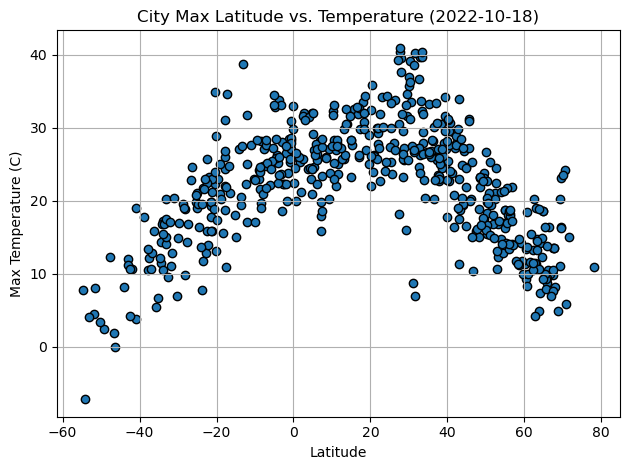

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig, ax = plt.subplots()

# Incorporate the other graph properties
ax.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
ax.set_title('City Max Latitude vs. Temperature (2022-10-18)')
ax.grid(True)
fig.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

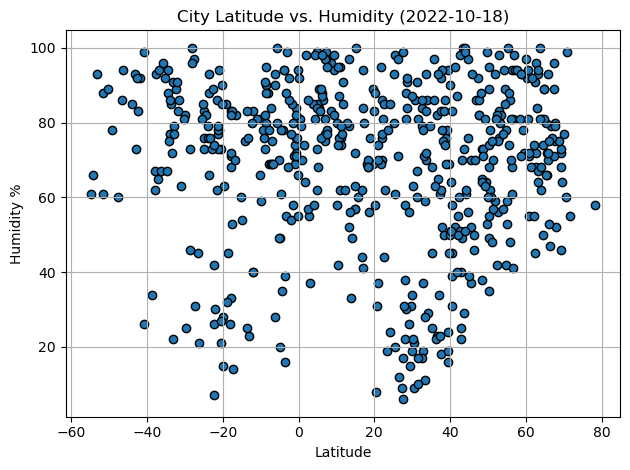

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig, ax = plt.subplots()

# Incorporate the other graph properties
ax.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
ax.set_title('City Latitude vs. Humidity (2022-10-18)')
ax.grid(True)
fig.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

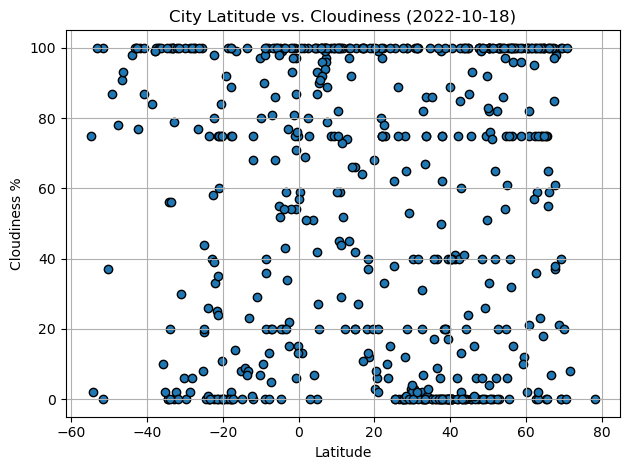

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig, ax = plt.subplots()

# Incorporate the other graph properties
ax.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
ax.set_title('City Latitude vs. Cloudiness (2022-10-18)')
ax.grid(True)
fig.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

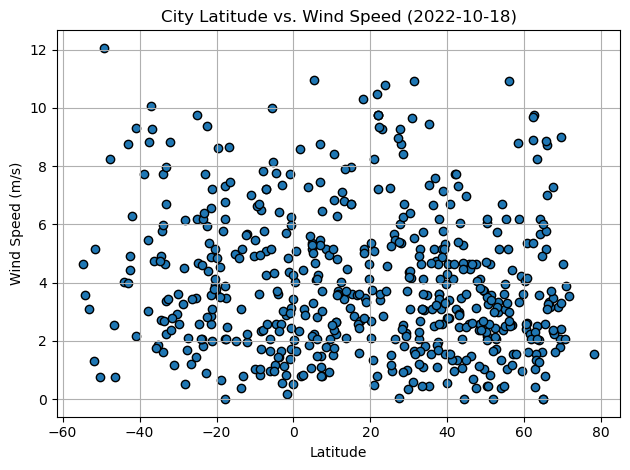

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig, ax = plt.subplots()
# Incorporate the other graph properties
# YOUR CODE HERE
ax.scatter(x_values,y_values, edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
ax.set_title('City Latitude vs. Wind Speed (2022-10-18)')
ax.grid(True)
fig.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def line_reg(x_values, y_values, ylabel, annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,4.85,100,100,3.58,CA,1691607722
3,sarakhs,36.5449,61.1577,30.09,23,9,2.50,IR,1691607961
6,flin flon,54.7682,-101.8650,16.91,42,20,3.60,CA,1691607962
8,jamestown,42.0970,-79.2353,27.23,55,0,7.72,US,1691607908
13,schwedt (oder),53.0596,14.2815,16.80,80,100,3.33,DE,1691607775


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,85,98,4.02,NZ,1691607960
1,west island,-12.1568,96.8225,24.99,83,75,5.66,CC,1691607960
4,hermanus,-34.4187,19.2345,14.33,88,0,4.93,ZA,1691607961
5,kabinda,-6.1333,24.4833,25.17,28,68,0.97,CD,1691607961
7,mount gambier,-37.8333,140.7667,10.45,67,99,5.46,AU,1691607930


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6492645547673764


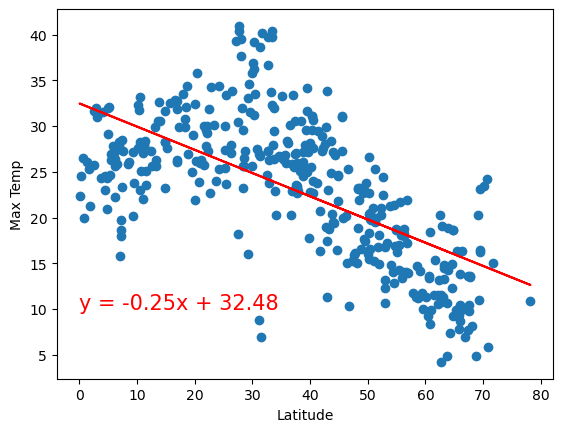

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel = 'Max Temp'
annotate = (0,10)
line_reg(x_values, y_values, ylabel, annotate)

The r-value is: 0.8065314431837237


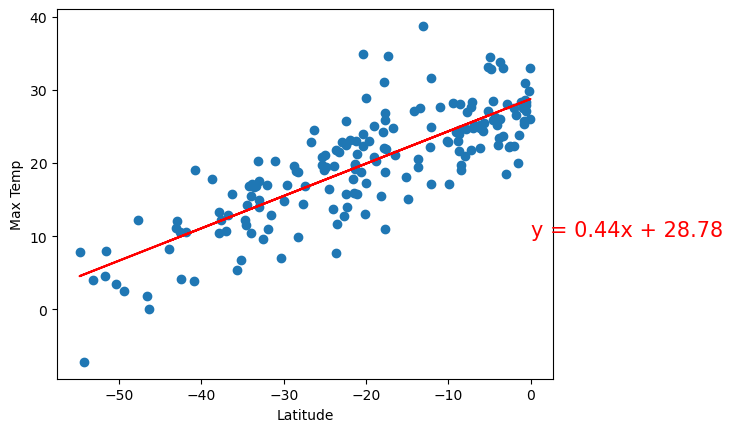

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
ylabel = 'Max Temp'
annotate = (0,10)

line_reg(x_values, y_values, ylabel, annotate)

**Discussion about the linear relationship:** There was strong correlation between the maximum temperature increasing with latitude increasing towards the equator( 0 degrees in latitude); maximum tempurature decreased as you the latitude increased away from the equator( 0 degrees in latitude).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.00019076110008553633


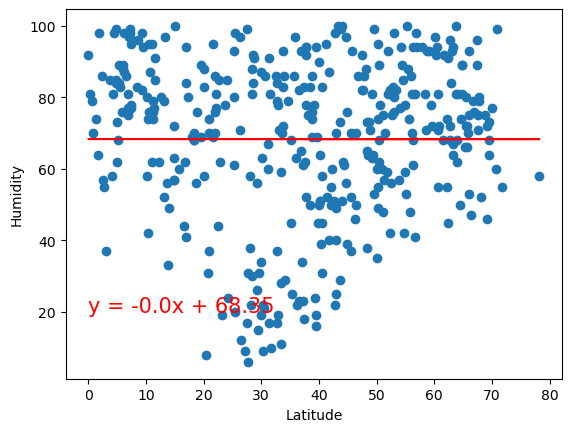

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
ylabel = 'Humidity'
annotate = (0,20)

line_reg(x_values, y_values, ylabel, annotate)

The r-value is: -0.09324141698683361


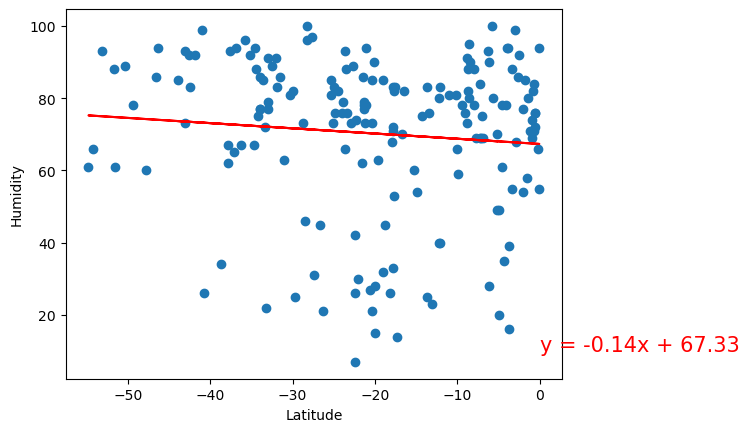

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
ylabel = 'Humidity'
annotate = (0,10)

line_reg(x_values, y_values, ylabel, annotate)

**Discussion about the linear relationship:** There was a weak correlation between the increase of Humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06258634300024542


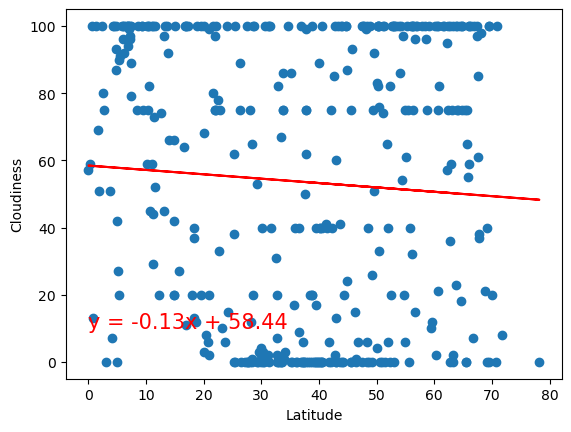

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
ylabel = 'Cloudiness'
annotate = (0,10)

line_reg(x_values, y_values, ylabel, annotate)

The r-value is: -0.08309590117113175


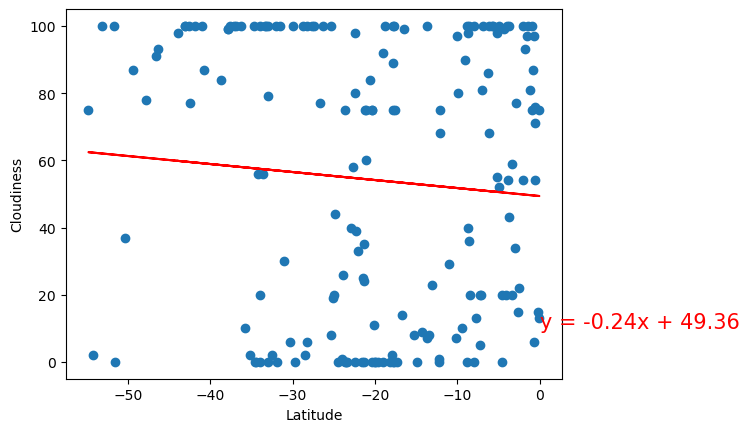

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
ylabel = 'Cloudiness'
annotate = (0,10)

line_reg(x_values, y_values, ylabel, annotate)

**Discussion about the linear relationship:** There was a weak correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11893931887306526


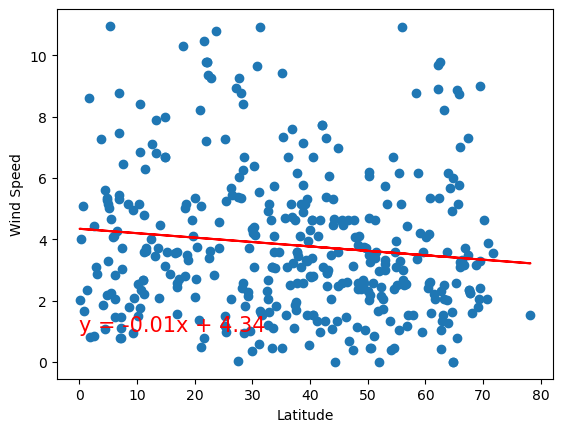

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
ylabel = 'Wind Speed'
annotate = (0,1)

line_reg(x_values, y_values, ylabel, annotate)

The r-value is: -0.15130782367509432


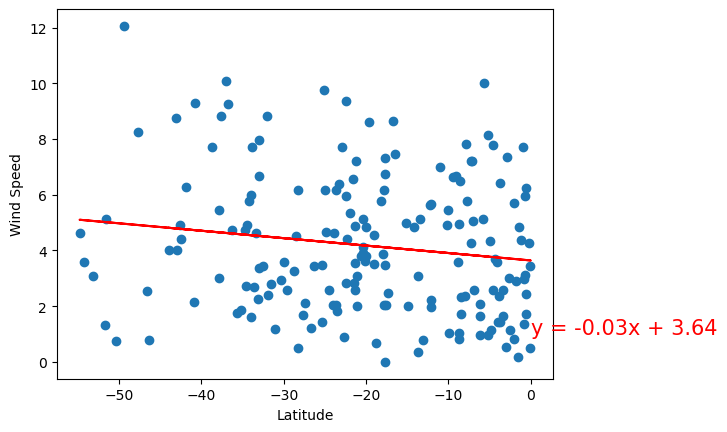

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
ylabel = 'Wind Speed'
annotate = (0,1)

line_reg(x_values, y_values, ylabel, annotate)

**Discussion about the linear relationship:** There was some correlation between wind speed decreasing as the latitude increased even past the equator.